In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import numpy as np 
import time

In [12]:
C = 1
kernel = 'linear'
iterations = 200000  

In [13]:
FAST_DRAW = True

In [14]:
def drawPlots(model, X_train, X_test, y_train, y_test, wintitle='Figure 1'):
  # INFO: A convenience function for you
  # You can use this to break any higher-dimensional space down
  # And view cross sections of it.

  # If this line throws an error, use plt.style.use('ggplot') instead
  mpl.style.use('ggplot')  # Look Pretty

  padding = 3
  resolution = 0.5
  max_2d_score = 0

  y_colors = ['#ff0000', '#00ff00', '#0000ff']
  my_cmap = mpl.colors.ListedColormap(['#ffaaaa', '#aaffaa', '#aaaaff'])
  colors = [y_colors[i] for i in y_train]
  num_columns = len(X_train.columns)

  fig = plt.figure()
  fig.canvas.set_window_title(wintitle)

  cnt = 0
  for col in range(num_columns):
    for row in range(num_columns):
      # Easy out
      if FAST_DRAW and col > row:
        cnt += 1
        continue

      ax = plt.subplot(num_columns, num_columns, cnt + 1)
      plt.xticks(())
      plt.yticks(())

      # Intersection:
      if col == row:
        plt.text(0.5, 0.5, X_train.columns[row], verticalalignment='center', horizontalalignment='center', fontsize=12)
        cnt += 1
        continue

      # Only select two features to display, then train the model
      X_train_bag = X_train.ix[:, [row, col]]
      X_test_bag = X_test.ix[:, [row, col]]
      model.fit(X_train_bag, y_train)

      # Create a mesh to plot in
      x_min, x_max = X_train_bag.ix[:, 0].min() - padding, X_train_bag.ix[:, 0].max() + padding
      y_min, y_max = X_train_bag.ix[:, 1].min() - padding, X_train_bag.ix[:, 1].max() + padding
      xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                           np.arange(y_min, y_max, resolution))

      # Plot Boundaries
      plt.xlim(xx.min(), xx.max())
      plt.ylim(yy.min(), yy.max())

      # Prepare the contour
      Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
      Z = Z.reshape(xx.shape)
      plt.contourf(xx, yy, Z, cmap=my_cmap, alpha=0.8)
      plt.scatter(X_train_bag.ix[:, 0], X_train_bag.ix[:, 1], c=colors, alpha=0.5)

      score = round(model.score(X_test_bag, y_test) * 100, 3)
      plt.text(0.5, 0, "Score: {0}".format(score), transform=ax.transAxes, horizontalalignment='center', fontsize=8)
      max_2d_score = score if score > max_2d_score else max_2d_score

      cnt += 1

  print ("Max 2D Score: ", max_2d_score)
  fig.set_tight_layout(True)

In [15]:
def benchmark(model, X_train, X_test, y_train, y_test, wintitle='Figure 1'):
  print ('\n\n' + wintitle + ' Results')
  s = time.time()
  for i in range(iterations):
    model.fit(X_train,y_train)
  print ("{0} Iterations Training Time: ".format(iterations), time.time() - s)

  s = time.time()
  for i in range(iterations):
    score = model.score(X_test,y_test)
  print ("{0} Iterations Scoring Time: ".format(iterations), time.time() - s)
  print ("High-Dimensionality Score: ", round((score * 100), 3))

In [16]:
X = pd.read_csv('Datasets/wheat.data', sep=",")
#print (X[pd.isnull(X).any(axis=1)])
X = X.drop("id", axis =1)
X = X.dropna(axis=0)

In [17]:
y = X["wheat_type"]
y = y.map({'canadian': 0, 'kama': 1, 'rosa': 2})
X = X.drop("wheat_type", axis = 1)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=7)

In [19]:
svc = SVC(kernel = 'linear', C=C)
knn = KNeighborsClassifier(n_neighbors=5)



KNeighbors Results
200000 Iterations Training Time:  81.98801302909851
200000 Iterations Scoring Time:  192.60239505767822
High-Dimensionality Score:  83.607


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel_launcher.py:40: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel_launcher.py:41: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel_launcher.py:45: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


Max 2D Score:  90.164


SVC Results
200000 Iterations Training Time:  170.8344759941101
200000 Iterations Scoring Time:  83.24973893165588
High-Dimensionality Score:  86.885
Max 2D Score:  93.443


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


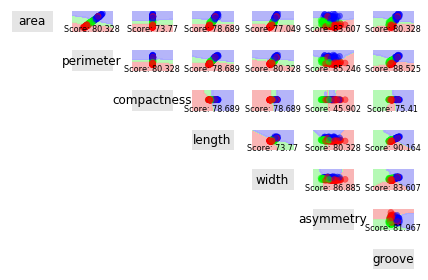

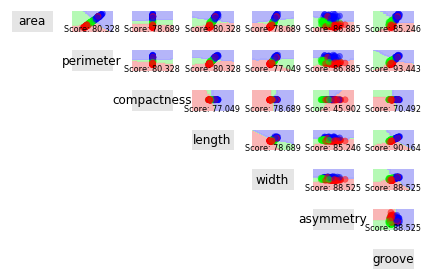

In [20]:
benchmark(knn, X_train, X_test, y_train, y_test, 'KNeighbors')
drawPlots(knn, X_train, X_test, y_train, y_test, 'KNeighbors')

benchmark(svc, X_train, X_test, y_train, y_test, 'SVC')
drawPlots(svc, X_train, X_test, y_train, y_test, 'SVC')

plt.show()
